<a href="https://colab.research.google.com/github/meitalhp/DataSet_project/blob/main/EDA_GET_flight_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns
import datetime

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center> Reading the data: </center></h2>

</div>

In [40]:
flight_data=pd.read_csv('/content/Result_flight.csv')
print(flight_data.info())

flight_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37922 entries, 0 to 37921
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   enter_time         37922 non-null  object
 1   exit_time          37922 non-null  object
 2   T3_T1              37922 non-null  int64 
 3   num_of_flights_T3  37922 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ MB
None


,enter_time,exit_time,T3_T1,num_of_flights_T3
0,01/09/2022 00:00,01/09/2022 00:30,3,2
1,01/09/2022 00:00,01/09/2022 00:30,1,0
2,01/09/2022 00:30,01/09/2022 01:00,1,0
3,01/09/2022 00:30,01/09/2022 01:00,3,7
4,01/09/2022 01:00,01/09/2022 01:30,3,1


In [41]:
flight_data.isnull().sum()

enter_time           0
exit_time            0
T3_T1                0
num_of_flights_T3    0
dtype: int64

In [42]:
flight_data=flight_data.dropna(how='any')
flight_data=flight_data[flight_data['T3_T1']==3]
flight_data

,enter_time,exit_time,T3_T1,num_of_flights_T3
0,01/09/2022 00:00,01/09/2022 00:30,3,2
3,01/09/2022 00:30,01/09/2022 01:00,3,7
4,01/09/2022 01:00,01/09/2022 01:30,3,1
7,01/09/2022 01:30,01/09/2022 02:00,3,4
9,01/09/2022 02:00,01/09/2022 02:30,3,5
...,...,...,...,...
37913,30/09/2023 22:00,30/09/2023 22:30,3,2
37915,30/09/2023 22:30,30/09/2023 23:00,3,5
37917,30/09/2023 23:00,30/09/2023 23:30,3,5
37918,30/09/2023 23:30,01/10/2023 00:00,3,6


In [43]:
# Sort by the WAIT column
flight_data.sort_values(by='num_of_flights_T3', inplace=True)

# Print the sorted DataFrame
flight_data

,enter_time,exit_time,T3_T1,num_of_flights_T3
12103,05/01/2023 01:30,05/01/2023 02:00,3,0
25381,23/05/2023 09:00,23/05/2023 09:30,3,0
19624,24/03/2023 10:00,24/03/2023 10:30,3,0
22468,23/04/2023 01:00,23/04/2023 01:30,3,0
3540,07/10/2022 21:00,07/10/2022 21:30,3,0
...,...,...,...,...
189,02/09/2022 23:00,02/09/2022 23:30,3,12
36823,19/09/2023 13:30,19/09/2023 14:00,3,12
31438,25/07/2023 11:30,25/07/2023 12:00,3,12
34709,28/08/2023 13:00,28/08/2023 13:30,3,12


In [44]:
october_not_used=True
if october_not_used==True:
  flight_data['exit_time']=pd.to_datetime(flight_data['exit_time'],format='%d/%m/%Y %H:%M',dayfirst=True)
  flight_data=flight_data[flight_data['exit_time']<= '2023-09-30 00:00']

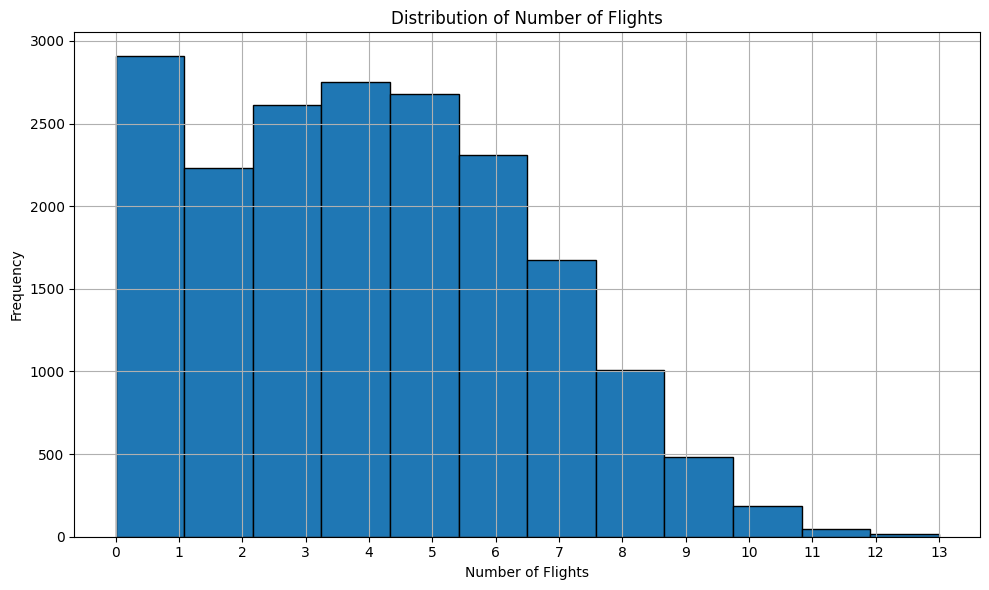

In [45]:
# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(flight_data['num_of_flights_T3'], bins=12, edgecolor='black')
plt.title('Distribution of Number of Flights')
plt.xlabel('Number of Flights')
plt.ylabel('Frequency')
plt.grid(True)

# Setting x-axis labels to show all values
unique_values = sorted(flight_data['num_of_flights_T3'].unique())
plt.xticks(unique_values)

plt.tight_layout()
plt.show()

In [46]:
# Calculate the 2.5th and 97.5th percentiles
percentile_2_5 = flight_data['num_of_flights_T3'].quantile(0.025)
percentile_97_5 = flight_data['num_of_flights_T3'].quantile(0.975)

# Filter the data to include only the central 95%
filtered_df = flight_data[(flight_data['num_of_flights_T3'] >= percentile_2_5) & (flight_data['num_of_flights_T3'] <= percentile_97_5)]
filtered_df

,enter_time,exit_time,T3_T1,num_of_flights_T3
12103,05/01/2023 01:30,2023-01-05 02:00:00,3,0
25381,23/05/2023 09:00,2023-05-23 09:30:00,3,0
19624,24/03/2023 10:00,2023-03-24 10:30:00,3,0
22468,23/04/2023 01:00,2023-04-23 01:30:00,3,0
3540,07/10/2022 21:00,2022-10-07 21:30:00,3,0
...,...,...,...,...
20797,05/04/2023 15:00,2023-04-05 15:30:00,3,9
31931,30/07/2023 14:30,2023-07-30 15:00:00,3,9
4112,13/10/2022 20:00,2022-10-13 20:30:00,3,9
1833,20/09/2022 02:00,2022-09-20 02:30:00,3,9


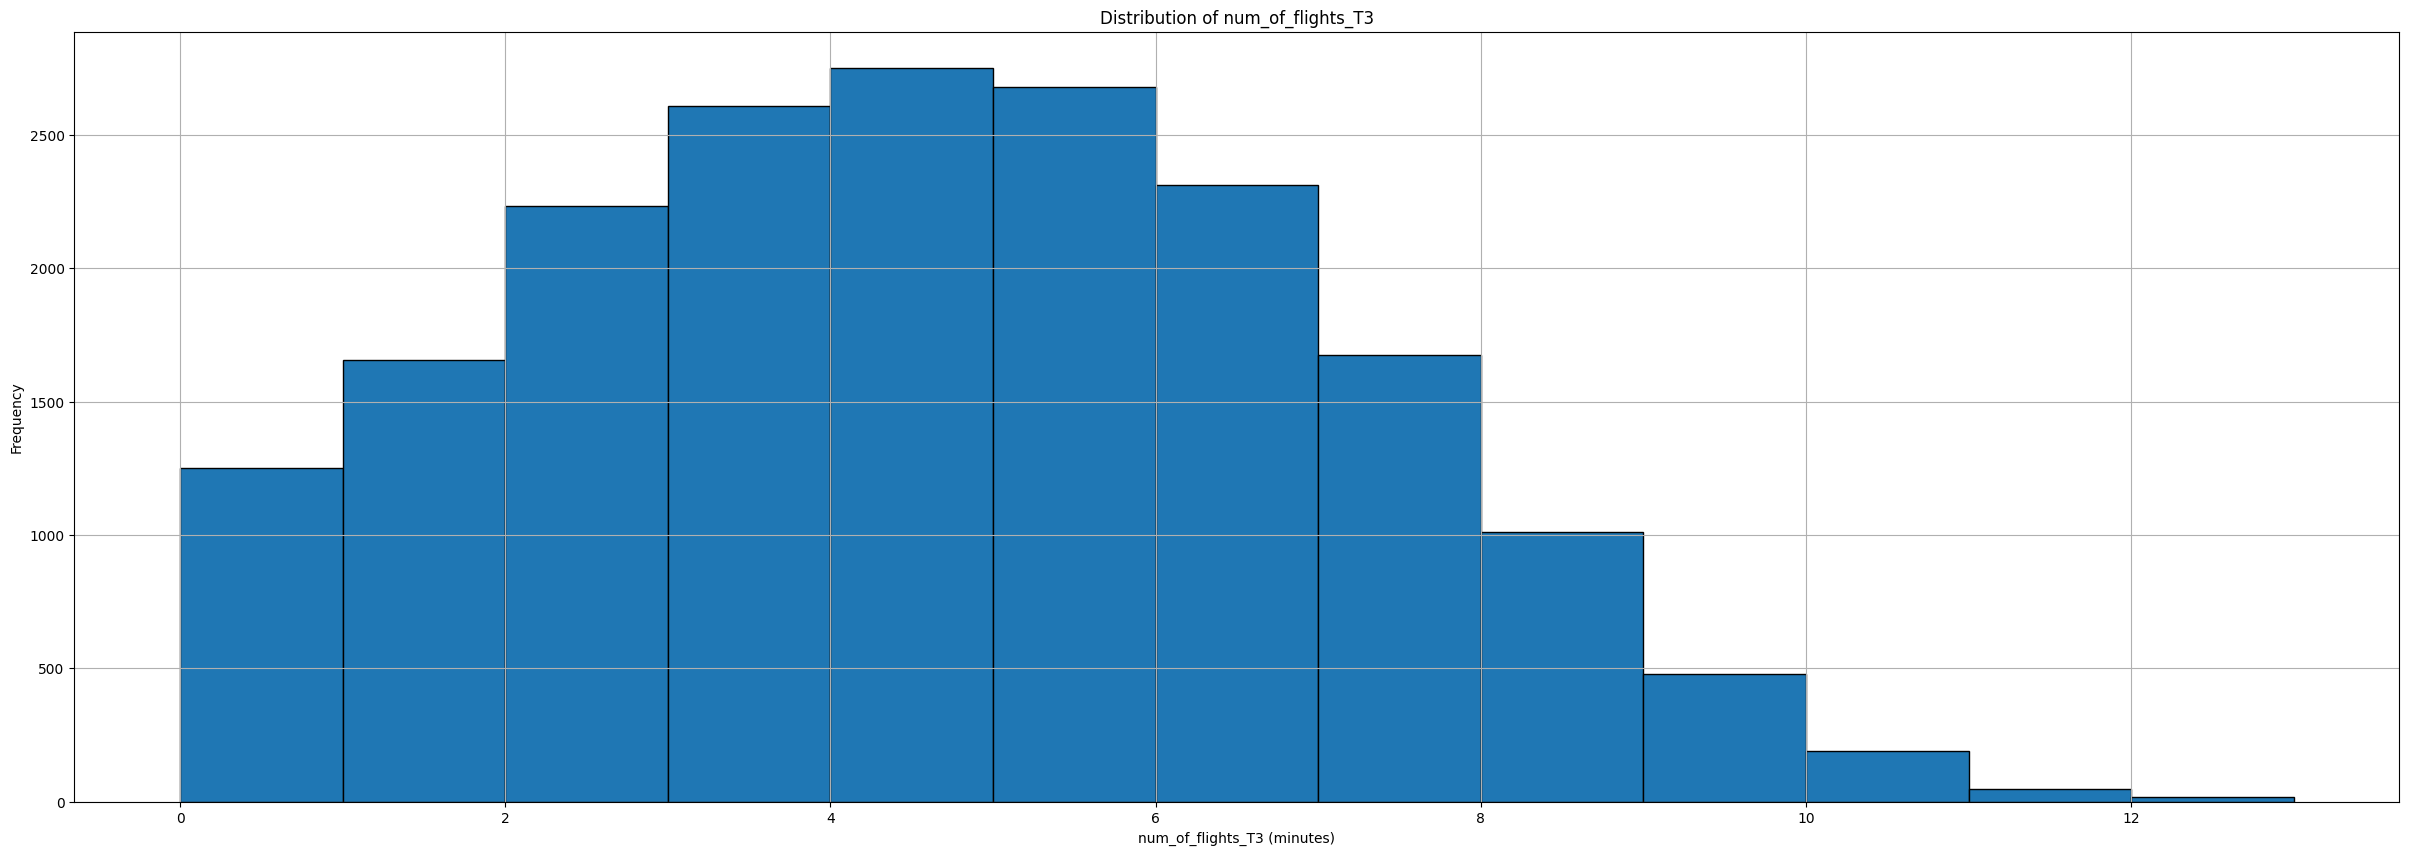

In [47]:
# Plotting again the distribution
plt.figure(figsize=(30, 10))
plt.hist(flight_data['num_of_flights_T3'], bins=13, edgecolor='black')
plt.title('Distribution of num_of_flights_T3')
plt.xlabel('num_of_flights_T3 (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [48]:

# Convert 'enter_time' to datetime
flight_data['enter_time']=pd.to_datetime(flight_data['enter_time'],format='%d/%m/%Y %H:%M',dayfirst=True)

# Extract the hour and date from 'enter_time'
flight_data['date'] = flight_data['enter_time'].dt.date
flight_data['hour'] = flight_data['enter_time'].dt.hour
flight_data['minute'] = flight_data['enter_time'].dt.minute

# Group by 'date' and 'hour' and calculate the average 'num_of_flights_T3'
grouped_df = flight_data.groupby(['enter_time','date', 'hour','minute'])['num_of_flights_T3'].mean().reset_index()

# Rename columns for clarity
grouped_df.columns = ['enter_time','date', 'hour','minute', 'Average_num_of_flights_T3']
grouped_df

<ipython-input-48-39ca76354537>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data['enter_time']=pd.to_datetime(flight_data['enter_time'],format='%d/%m/%Y %H:%M',dayfirst=True)
<ipython-input-48-39ca76354537>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data['date'] = flight_data['enter_time'].dt.date
<ipython-input-48-39ca76354537>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,enter_time,date,hour,minute,Average_num_of_flights_T3
0,2022-09-01 00:00:00,2022-09-01,0,0,2.0
1,2022-09-01 00:30:00,2022-09-01,0,30,7.0
2,2022-09-01 01:00:00,2022-09-01,1,0,1.0
3,2022-09-01 01:30:00,2022-09-01,1,30,4.0
4,2022-09-01 02:00:00,2022-09-01,2,0,5.0
...,...,...,...,...,...
18907,2023-09-29 21:30:00,2023-09-29,21,30,5.0
18908,2023-09-29 22:00:00,2023-09-29,22,0,4.0
18909,2023-09-29 22:30:00,2023-09-29,22,30,4.0
18910,2023-09-29 23:00:00,2023-09-29,23,0,2.0


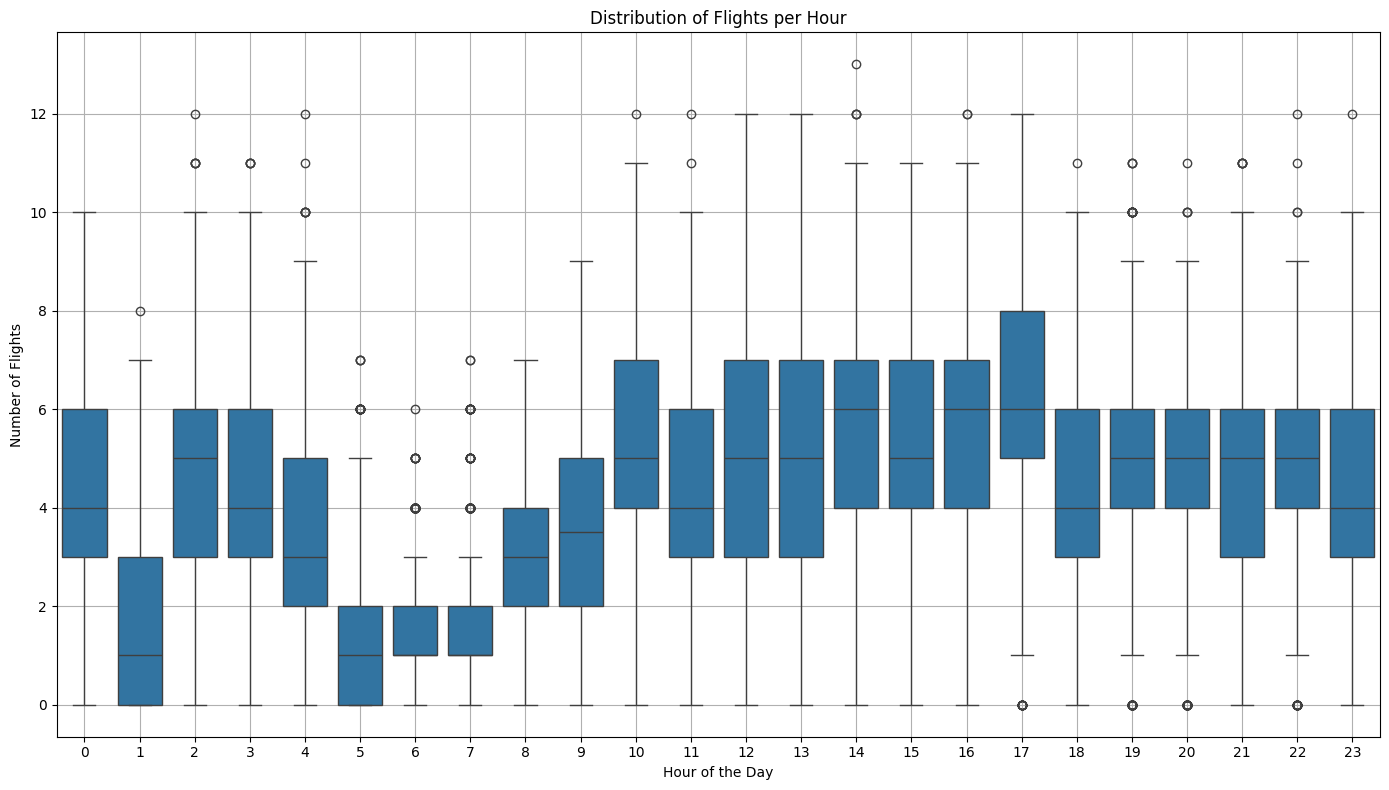

In [49]:
#boxplot of the num of flight per hour
plt.figure(figsize=(14, 8))
sns.boxplot(x='hour', y='Average_num_of_flights_T3', data=grouped_df)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flights per Hour')
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
# Group by 'date' and 'hour' and calculate the average 'minutes_to_order'
grouped_h = flight_data.groupby('hour')['num_of_flights_T3'].mean().reset_index()


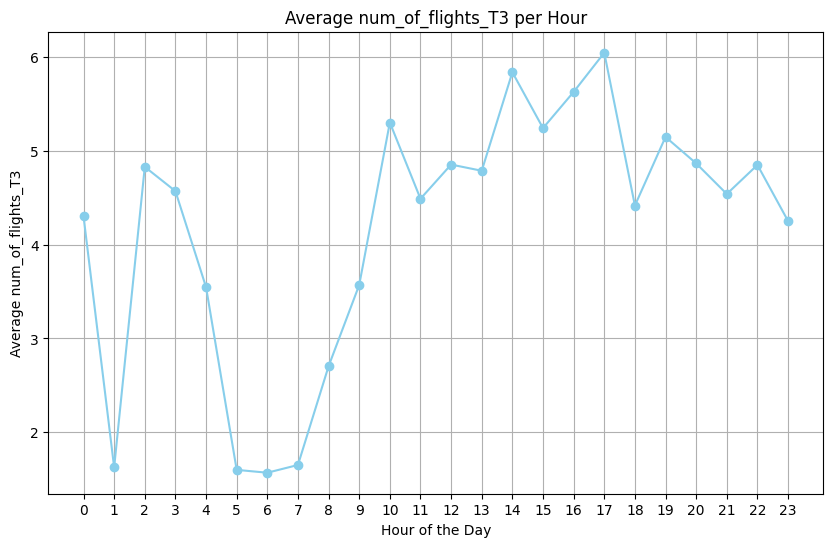

In [51]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(grouped_h.hour, grouped_h.num_of_flights_T3, marker='o', linestyle='-', color='skyblue')
plt.title('Average num_of_flights_T3 per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average num_of_flights_T3')
plt.xticks(range(24))
plt.grid(True)
plt.show()

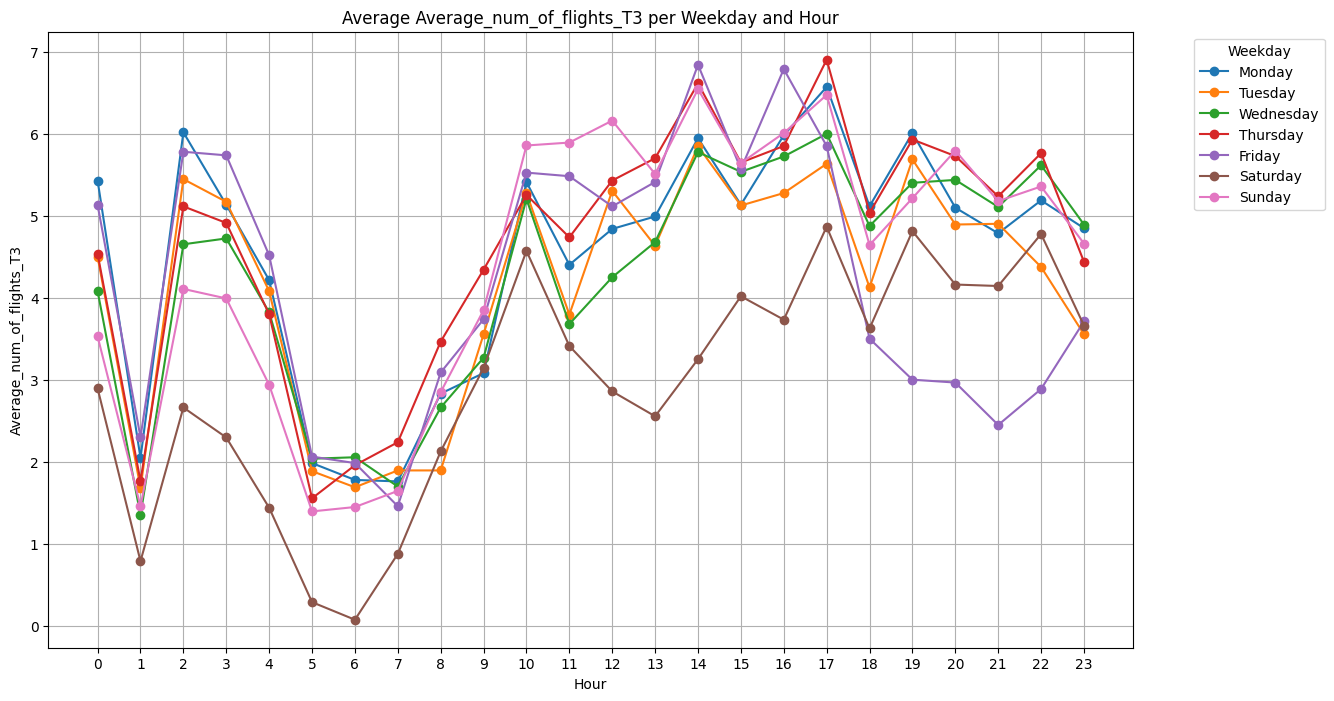

In [52]:
grouped_df['date'] = pd.to_datetime(grouped_df['date'])

#extract the weekday
grouped_df['weekday'] = grouped_df['date'].dt.day_name()

# Group by 'hour' and 'weekday' and calculate the average 'Average_num_of_flights_T3'
grouped_df_weekly = grouped_df.groupby(['hour', 'weekday'], as_index=False)['Average_num_of_flights_T3'].mean()

# Pivot the DataFrame to get a matrix-like DataFrame for plotting
pivot_df = grouped_df_weekly.pivot(index='hour', columns='weekday', values='Average_num_of_flights_T3')

# Reorder columns to ensure the correct order of weekdays
pivot_df = pivot_df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Plotting the results
plt.figure(figsize=(14, 8))
for day in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[day], marker='o', linestyle='-', label=day)

plt.title('Average Average_num_of_flights_T3 per Weekday and Hour')
plt.xlabel('Hour')
plt.ylabel('Average_num_of_flights_T3')
plt.xticks(range(24))
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


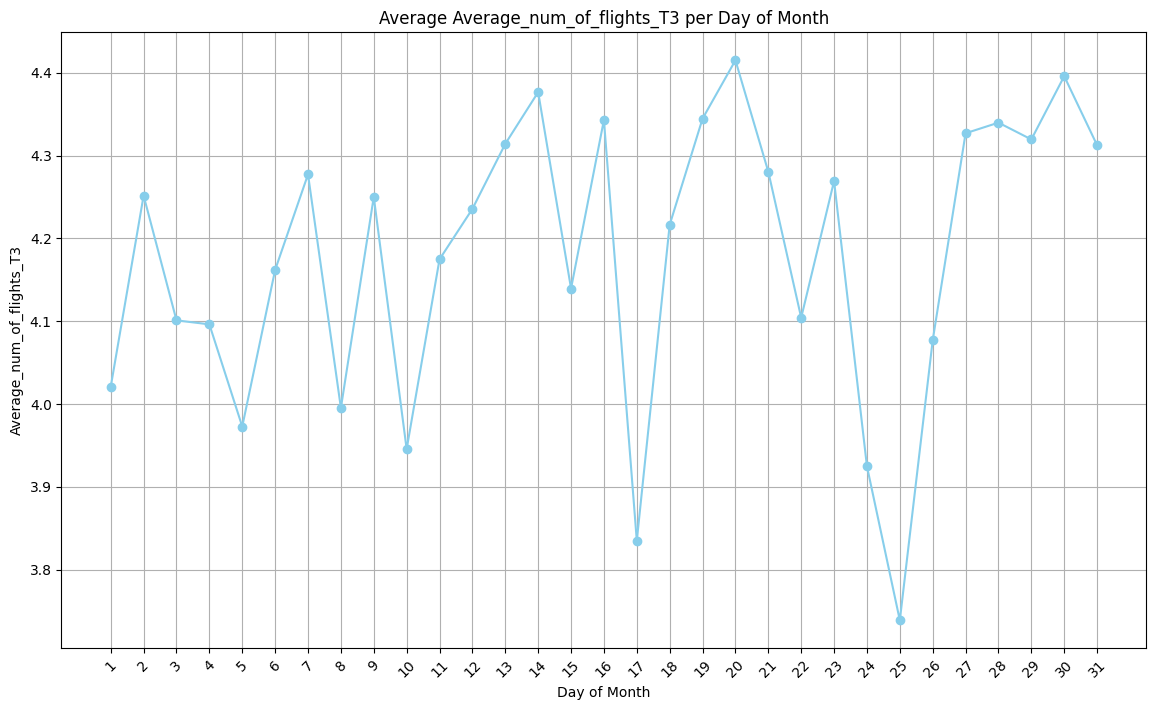

In [53]:

# Extract the day of the month
grouped_df['day'] = grouped_df['date'].dt.day

# Group by 'day' and calculate the average 'Average_Minutes_to_Order'
daily_avg = grouped_df.groupby('day')['Average_num_of_flights_T3'].mean()

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(daily_avg.index, daily_avg.values, marker='o', linestyle='-', color='skyblue')
plt.title('Average Average_num_of_flights_T3 per Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Average_num_of_flights_T3')
plt.xticks(range(1, 32), rotation=45)
plt.grid(True)
plt.show()

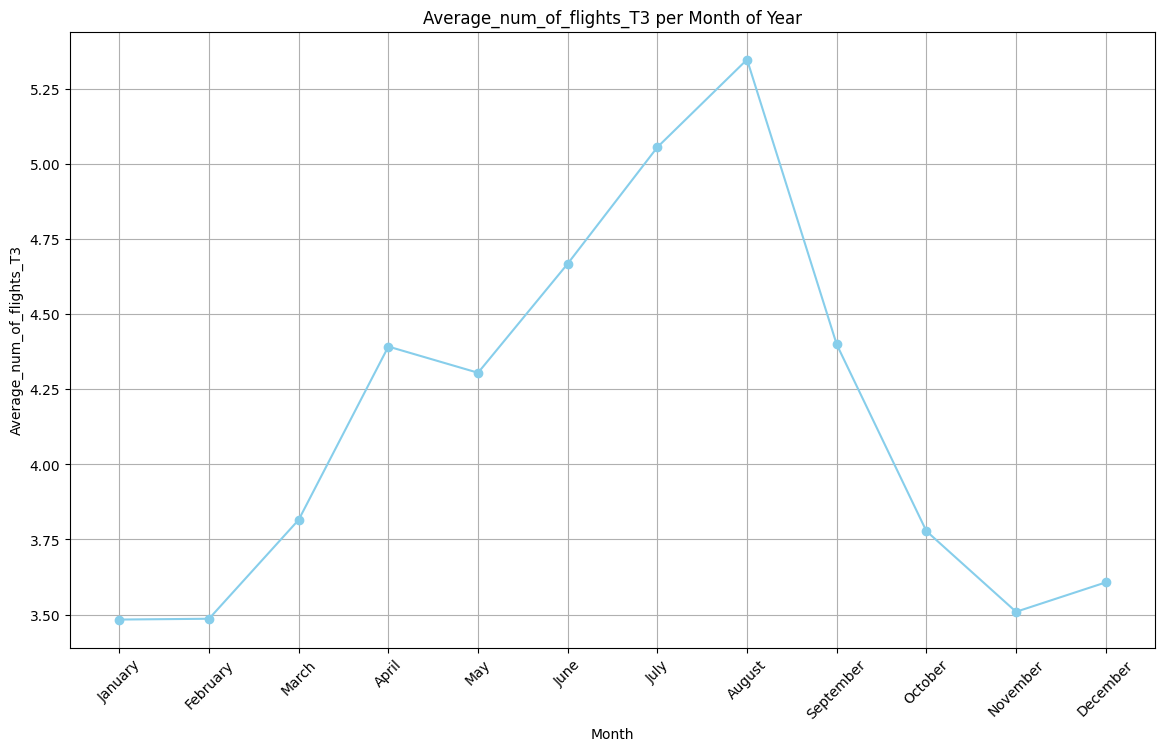

In [54]:
# Extract the month of the year
grouped_df['month'] = grouped_df['date'].dt.month_name()

# Group by 'month' and calculate the average 'Average_Minutes_to_Order'
monthly_avg = grouped_df.groupby('month')['Average_num_of_flights_T3'].mean()

# Reorder the months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(months_order)

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='skyblue')
plt.title('Average_num_of_flights_T3 per Month of Year')
plt.xlabel('Month')
plt.ylabel('Average_num_of_flights_T3')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [55]:
grouped_df.to_csv('clean_flight_result.csv',index=False)